<a href="https://colab.research.google.com/github/KandamuruAdityamanoj/AI-ML-Internship-by-Tech-Mythree/blob/main/Task2dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bank Customer Churn Prediction.csv')

In [ ]:
print(df.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


Univariate Analysis

In [ ]:
def univariate_analysis(data, column):
    plt.figure(figsize=(10, 6))
    if data[column].dtype == 'O':
        sns.countplot(data=data, x=column)
    else:
        sns.histplot(data[column], kde=True)
    plt.title(f'Univariate Analysis of {column}')
    plt.show()

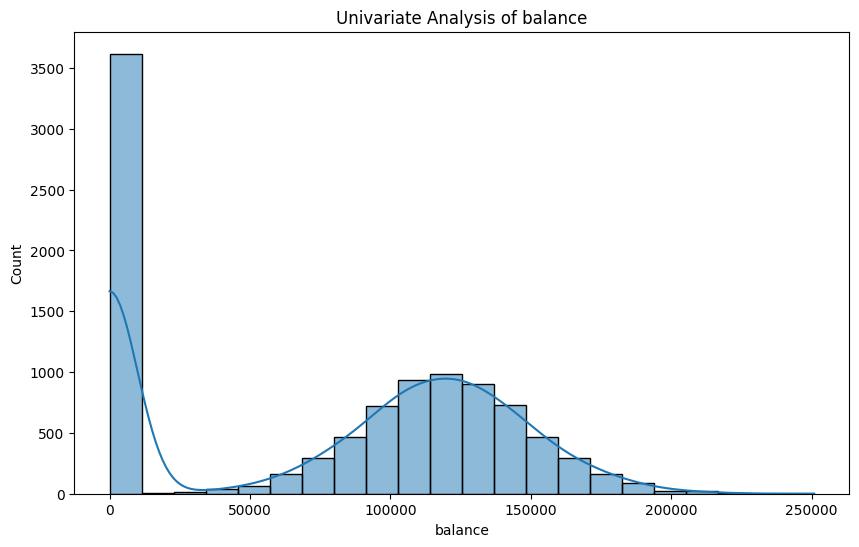

In [ ]:
univariate_analysis(df, 'balance')

Bivariate Analysis

In [ ]:
def bivariate_analysis(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    if data[x_column].dtype == 'O' and data[y_column].dtype == 'O':
        sns.countplot(data=data, x=x_column, hue=y_column)
    elif data[x_column].dtype != 'O' and data[y_column].dtype == 'O':
        sns.boxplot(data=data, x=x_column, y=y_column)
    else:
        sns.scatterplot(data=data, x=x_column, y=y_column)
    plt.title(f'Bivariate Analysis of {x_column} and {y_column}')
    plt.show()

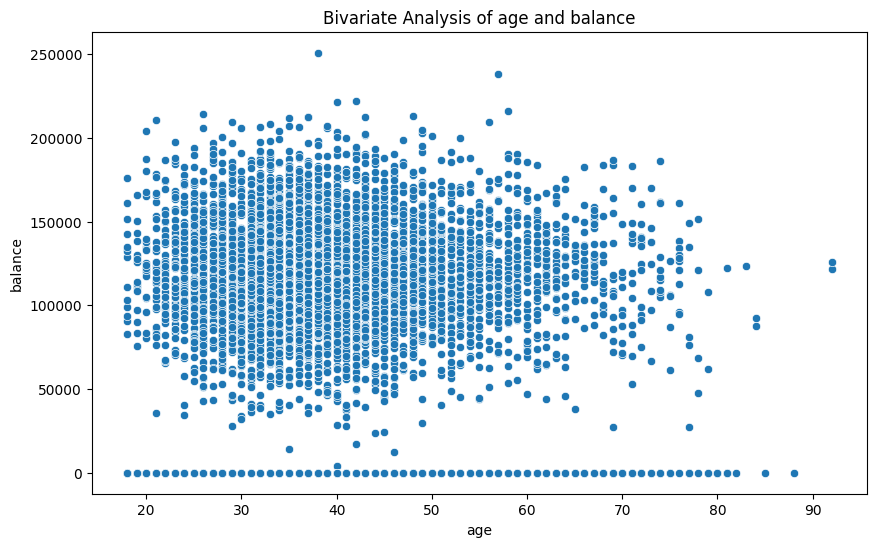

In [ ]:
bivariate_analysis(df, 'age', 'balance')

 Multivariate Analysis

In [ ]:
def multivariate_analysis(data, x_columns, y_column):
    X = data[x_columns]
    y = data[y_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'\nClassification Report:\n{classification_report(y_test, y_pred)}')

In [ ]:
multivariate_analysis(df, ['age', 'balance', 'credit_score'], 'churn')

Confusion Matrix:
[[1444  163]
 [ 275  118]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1607
           1       0.42      0.30      0.35       393

    accuracy                           0.78      2000
   macro avg       0.63      0.60      0.61      2000
weighted avg       0.76      0.78      0.77      2000

